In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
import os
import sys
import inspect

# insert root dir into sys
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
root_dir = os.path.dirname(currentdir)
# print(root_dir)

if root_dir not in sys.path:
     sys.path.insert(0, root_dir)

In [3]:
import sim1 as sm1

### EM for Gaussian mixture:

##### Define original model:

In [4]:
# 4 is enough:
steps = 4

imu = torch.tensor([1., 2., 3.])
isigma = torch.tensor([0.3, 0.3, 1.])
iwis = torch.tensor([0.1, 0.4, 0.5])
observed = sm1.sample_cs(100, imu, isigma, iwis)

##### Plot original:

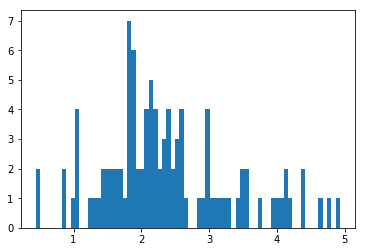

In [5]:
plt.hist(observed, 70)
plt.show()


##### Learn model using EM Gaussian mixture:

In [6]:
limu = torch.tensor([1., 3.5, 4.0])
lisigma = torch.tensor([1., 1.0, 1.0])
liwi = torch.tensor([0.1, 0.2, 0.7])
mus, sigmas, wis = sm1.learn_cs_em(observed, steps,
                                   limu, lisigma, liwi)

print("initial model:")
print((imu, isigma, iwis))

print("lerned initial model:")
print((limu, lisigma, liwi))
    
print("learned model:")
print((mus[-1], sigmas[-1], wis[-1]))
  

initial model:
(tensor([1., 2., 3.]), tensor([0.3000, 0.3000, 1.0000]), tensor([0.1000, 0.4000, 0.5000]))
lerned initial model:
(tensor([1.0000, 3.5000, 4.0000]), tensor([1., 1., 1.]), tensor([0.1000, 0.2000, 0.7000]))
learned model:
(tensor([1.8441, 2.3106, 2.6337]), tensor([0.0038, 0.4986, 1.4885]), tensor([0.1496, 0.4129, 0.4375]))


##### Plot results

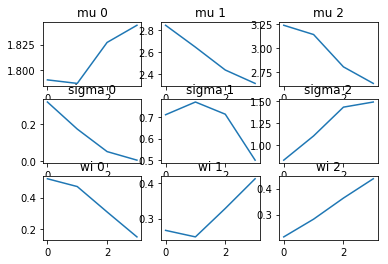

In [7]:
fig, axs = plt.subplots(3, 3)
names = ["mu", "sigma", "wi"]
data = [mus, sigmas, wis]

for i in range(3):
    name = names[i]
    for j in range(3):
        axs.flat[3*i+j].plot(data[i].T[j])
        axs.flat[3*i+j].set_title("%s %d" % (name, j))
plt.show()
# END FOR